# PyTorch Workflow

Pytorch end-to-end workflow
ref - 
* https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* https://www.learnpytorch.io/01_pytorch_workflow/
* https://github.com/mrdbourke/pytorch-deep-learning/discussions

In [1]:
what_were_covering = {1: "data (prepare adn load)",
                     2: "build model",
                     3: "fitting model to data (training)",
                     4: "making prediction and evaluating a model (inference)",
                     5: "saving and loading a model",
                     6: "putting it all together"}
what_were_covering

{1: 'data (prepare adn load)',
 2: 'build model',
 3: 'fitting model to data (training)',
 4: 'making prediction and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
import numpy as np
from torch import nn #nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

#Check Pytorch Version
torch.__version__

'2.0.0'

## Data (preparation and loading)

Data can be almost anything ... in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos
* Audios
* DNA
* Text

Machine Learning's Two Parts:
1. Get data into numerical represntation
2. Build model to learn patterns in numerical representation

To showcase, create some *known* data using linear regression formula.

use a Linear regression formula to make a straight line with *know* **parameters**.

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) 
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### Spliting Data into train and test sets (imp concepts)

create training and test sets

In [5]:
# Create train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

**"Visualize, visualize, visualize!"**

In [6]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=torch.Tensor()):
    """
    Plots Training and Testing data as well as compares predictions
    """
    plt.figure(figsize=(10,7))
    
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    
    # Plot Predictions if exist
    if predictions.numel():
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    # Show the legend
    plt.legend(prop={"size": 14})

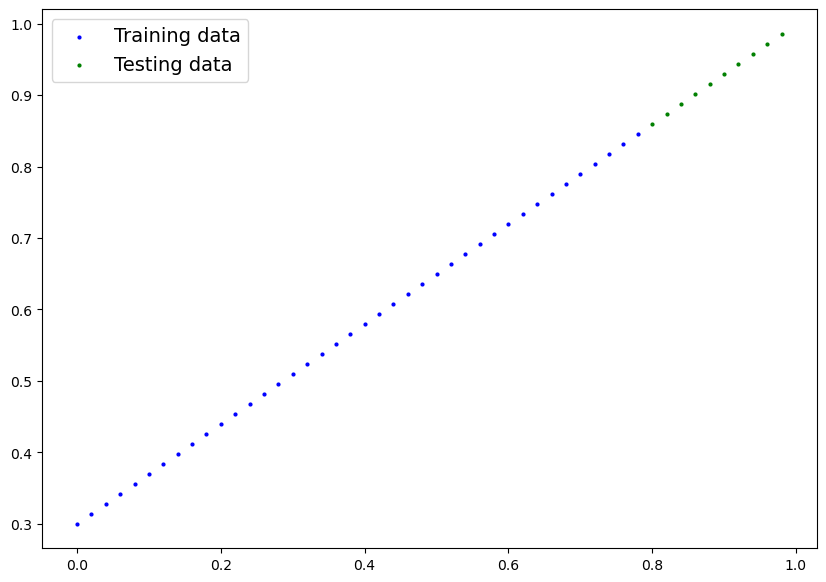

In [7]:
plot_predictions()

## 2. Build Model

PyTorch Model !!!

for python classes (OOPs)
ref - 
* https://realpython.com/python3-object-oriented-programming/

What Model is doing:
* Start with random values (weight and bias)
* Look at training data and adjust wts and bias

how does it does?
1. Gradient descent
2. Back propogation

In [8]:
from torch import nn
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everyting in pytorch inherites from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                               requires_grad=True,
                                               dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
        
    # Forward method to define computatuion in model
    def forward(self, x:torch.Tensor) -> torch.Tensor: # 'X' in input data
        return self.weights * x + self.bias 

### Pytorch model Building essentials

* `torch.nn` - contains all of the building blocks for computational graphs (a neural networks can be considered as a computational graph).
* `torch.nn.Parameter` - what parameters should our model try and learn, often a Pytorch layer from `torch.nn` will set this for us.
* `torch.nn.Module` - thr base class for all nural network modules, if you subclass if you should overwrite `forward()`.
* `torch.optim` - this is where the optimizers in PyTorch live, they will help with gradient descent.
* `def forward()` - All `nn.Module` subclasses require you to overwrite `forward()`, this defines wha happens in forward propogation.

### Checking the contents of our PyTorch Model

let'see what's inside our models...

checking model parameters or what's inside ormodel using `.parameters()`

In [9]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out parmeters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
weight,bias

(0.7, 0.3)

### Making prediction using `torch.inference_mode()`

To predict y_test based on X_test, by passing data through model, its going to run through `forward()` method

In [12]:
ypred = model_0(X_test)

ypred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [13]:
# Make predcitons using model
with torch.inference_mode():
    y_pred = model_0(X_test)
    
# Similar but worse than inference hence not prefered
'''with torch.no_grad():
    y_pred = model_0(X_test)'''
    
print(y_pred)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


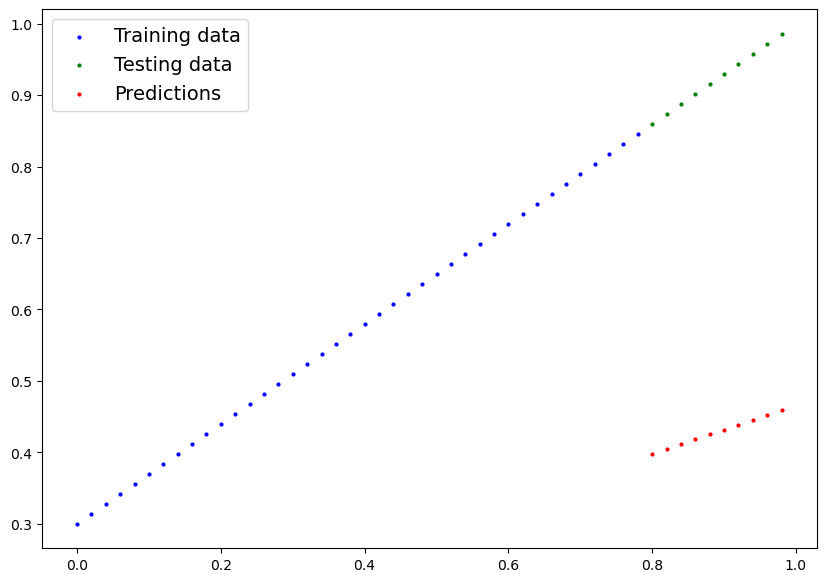

In [14]:
plot_predictions(predictions=y_pred)

## 3. Train Model

Idea of training is for a model to move form unknown parameters to some know parameters.

Or Poor representation of data to a better representations of data.

One way to Mesure how poor the model is performing we can use loss functions.

* Note: Loss Function is also  called as cost function or criterion.

Things we need to train:

* **Loss Function:** A funtion to measure how wrong is model predictions are.
* **Optimizers:** takes into account the loss of a model and adjusts the model's parameters (i.e. Weights & Bias) 
    > Two Important parameters inside optimizers
     * `params` - model prarameters you'd like to optimize, for example `params=model_0.parameters()`.
     * `lr` - learning rate is a hyperparameter that defines how big/small the optimizer changes the parameter with each step.

And specifically for Pytorch we need:
* Training Loop
* Testing Loop

In [15]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [17]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.01)

### Building a Training Loop (and a Testing Loop) in Pytorch

A couple of things we need in a training loop:
0. Loop through the data 
1. Forward pass (this involves data moving through our model's `forward()` functions.
2. Calculate the loss (compare forward pass predictons to ground truth labels)
3. Optimizer Zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of paramets of our model with repect to loss. (**Back Propogation**)
5. Optimizer Step - use the optimizer to adjust our model's parameters to try and imporve the loss. (**Gradient Descent**)


In [18]:
torch.manual_seed(42)

# An Epooch is one loop through Data
epochs = 200

# Tracking
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through Data
for epoch in range(epochs):
    # Set the model to training Mode 
    model_0.train() # train mode in Pytorch sets all parameters that require gradients to require gradients
    
    # 1. Forward Pass
    y_pred=model_0(X_train)
    
    # 2. Loss function
    loss = loss_fn(y_pred,y_train)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Performs back propogation on the loss with respect to parameters of model
    loss.backward()
    
    # 5. Step the optimizer (perform  gradient descent)
    optimizer.step() # By Default how optimizer changes will accumulate throught the loop so we have to zero them in step 3 in next iteration of loop
    
    model_0.eval() # Turns off various setting nt required for testing  (dropout/batch Norm layers)
    
    with torch.inference_mode(): # torch.no_grad() for older versions  | turns Gradient Off
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)
        
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | test: {loss} | test loss: {test_loss}")
    
        # print output
        print(model_0.state_dict())

Epoch: 0 | test: 0.31288138031959534 | test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | test: 0.1976713240146637 | test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | test: 0.08908725529909134 | test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | test: 0.053148526698350906 | test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | test: 0.04543796554207802 | test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | test: 0.04167863354086876 | test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | test: 0.03818932920694351 | test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [19]:
with torch.inference_mode():
    y_pred_new = model_0(X_test)

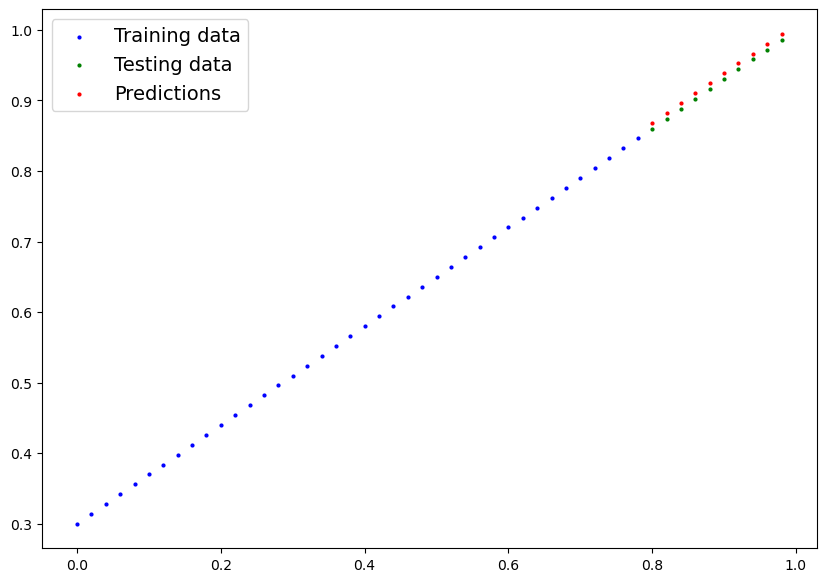

In [20]:
plot_predictions(predictions=y_pred_new)

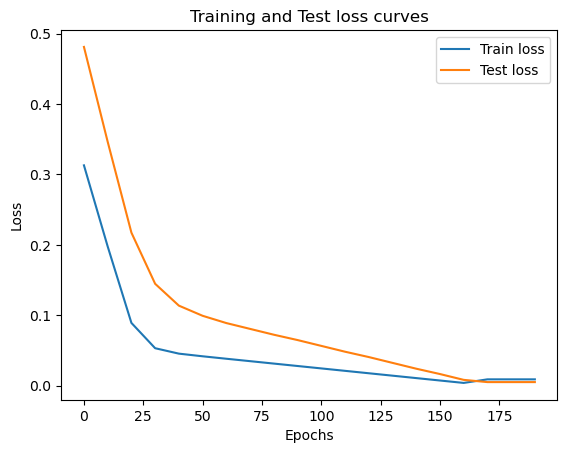

In [21]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label='Train loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title('Training and Test loss curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend();

## Saving a model in Pytorch

3 Main methos to Save and Load models in PyTorch

1. `torch.save()` - allows to save PyTorch object in Python's pickle format.
2. `torch.load()` - allows to load saved PyTorch object.
3. `torch.nn.Module.load_state_dict()` - alows to load a model's saved state dictionary i.e. `model_0.state_dict()`

In [22]:
# Saving our Pytorch model
from pathlib import Path

# 1. Create a model Directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_01_workflow.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Save model to: {MODEL_SAVE_PATH}")
torch.save(model_0.state_dict(),
          f=MODEL_SAVE_PATH)

Save model to: models/01_pytorch_01_workflow.pth
